---
## Models of Theoretical Physics
# Exercise Sheet 3 - Contact Process

The contact process is a simple yet powerful tool for understanding the dynamics of infection spread or, more broadly, state changes in a network. It is typically defined on a lattice where each site can either be in an 'infected' or 'healthy' state. In general, the dynamics of the model are governed by two primary processes:
- **Infection**: An infected site can infect its neighboring sites with a certain probability $\lambda$ per unit time.
- **Recovery**: Infected sites can recover and become healthy again with a probability $\mu$ per unit time.

The stochastic nature of the contact process can be described using a master equation, which encapsulates the probabilities of state changes (infection and recovery) in the system over time. The general form of the master equation for the contact process is as follows:

$$
\frac{dP(\sigma, t)}{dt} = \sum_{i} \left[ -\lambda \sigma_i P(\sigma, t) + \lambda (1 - \sigma_i) P(\sigma^i, t) \right] + \sum_{i} \left[ \mu (1 - \sigma_i) P(\sigma, t) - \mu \sigma_i P(\sigma^i, t) \right]
$$


Where:
- $ P(\sigma, t) $ is the probability of the system being in state $\sigma$ at time $t$.
- $\sigma_i $ represents the state of the $i$-th site (1 for infected, 0 for healthy).
- $\sigma^i $ is the state of the system with the $i$-th site's state flipped.
- $ \lambda $ is the infection rate.
- $ \mu $ is the recovery rate.





In [20]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns
    import matplotlib.colors as mcolors
except:
    print('Error: cannot import modules')
    print('Installing modules...')
    # install modules
    with open('requirements.txt') as f:
        requirements = f.read().splitlines()
        for r in requirements:
            !pip install {r}
            
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns
    import matplotlib.colors as mcolors

from matplotlib import animation
# set seaborn style
# this is a custom style that I created, but you can use any style you like
sns.set(rc={'figure.figsize':(3.5,3.5), 'figure.dpi':200, 'savefig.dpi':400, 'axes.linewidth': 3.5})
sns.set_theme(font="Avenir", font_scale=1.5, style="ticks", palette="colorblind", color_codes=True, 
              context="notebook", rc={'figure.figsize':(3.5,3.5), 
                                      'figure.dpi':200, 
                                      'savefig.dpi':400, 
                                      'axes.linewidth': 2.5})

In [46]:
def run_simulation(infection_rate, recovery_rate, initial_infected, max_time, lattice_size):
    '''
    Function to run a single simulation of the contact process
    
    Parameters
    ----------
    infection_rate : float
        Infection rate
    recovery_rate : float
        Recovery rate
    initial_infected : int
        Initial number of infected nodes
    max_time : int
        Maximum time steps
    lattice_size : int
        Size of the lattice
    
    Returns
    ----------
    lattice_states : array
        Lattice states over time
    '''
    
    # Initialize lattice with one infected node in the middle
    lattice = np.zeros(lattice_size)
    middle_index = lattice_size // 2
    lattice[middle_index - initial_infected // 2: middle_index + initial_infected // 2 + 1] = 1

    # Record lattice states over time
    lattice_states = np.zeros((max_time, lattice_size))
    lattice_states[0] = lattice.copy()

    for t in range(1, max_time):
        new_lattice = lattice.copy()
        for i in range(lattice_size):
            if lattice[i] == 1:
                # Infected node can recover
                if np.random.rand() < recovery_rate:
                    new_lattice[i] = 0
                # Infected node can infect neighbors
                for neighbor in [i-1, i+1]:
                    if 0 <= neighbor < lattice_size:
                        if np.random.rand() < infection_rate:
                            new_lattice[neighbor] = 1
        lattice = new_lattice
        lattice_states[t] = lattice

    return lattice_states

def plot_dynamics(sim, infection_rate, recovery_rate):
    fig, ax = plt.subplots(figsize=(2,2), constrained_layout=True)

    colors = ["green", "blue"]  # green for healthy, red for infected
    n_bins = [2]  # Discrete bins

    # Create a colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

    sns.heatmap(sim.T, ax=ax, cbar=False, cmap=cmap, square=True)
    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Lattice Position', fontsize=12)
    
    ax.set_title(f"$\lambda$ = {infection_rate}, $\mu$ = {recovery_rate}", fontsize=10)
    return fig, ax



In [49]:
# Parameters
lattice_size = 100  # Size of the lattice
max_time = 100  # Maximum time steps
infection_rates = [0.3, 0.6, 0.9]  # Infection rates (below, at, above critical)
recovery_rate = 1.  # Recovery rate
initial_infected = 5  # Initial number of infected nodes

simulations = [run_simulation(infection_rate, recovery_rate, initial_infected, max_time, lattice_size) for infection_rate in infection_rates]

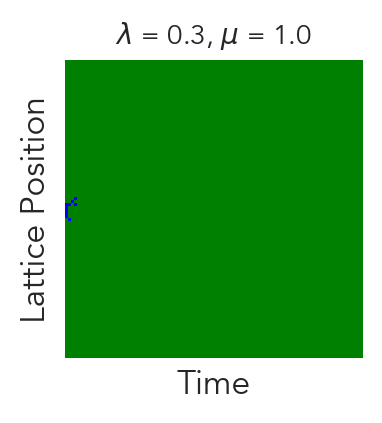

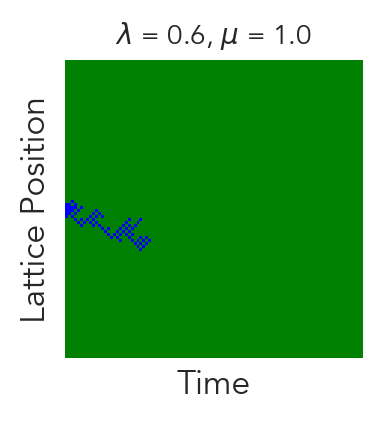

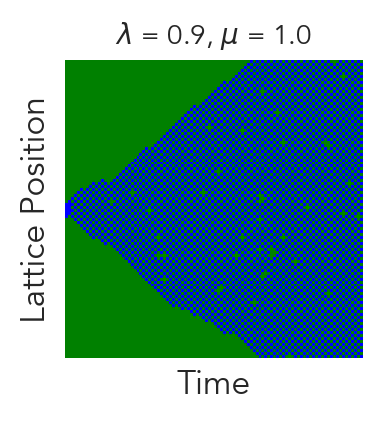

In [50]:
for i in range(3):
    fig, ax = plot_dynamics(simulations[i], infection_rates[i], recovery_rate)
    